# Pré-Processamento e Análise Exploratória (EDA): Projeto Bebo Bem - Gestão de Estoque

### *Importações e Leitura dos Dados*
---

In [110]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [111]:
dez = pd.read_csv('DEZ-2023.csv')
jan = pd.read_csv('JAN-2024.csv')
fev = pd.read_csv('FEV-2024.csv')
mar = pd.read_csv('MAR-2024.csv')
df = pd.concat([dez,jan,fev,mar], axis=0)
df.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,Histórico de estoque,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Data,Produto,NaN,Código,Movimentação,NaN,NaN,Qtd
2,NaN,31/12/2023 22:32,Lucky Strike Double Fresh,NaN,44,Venda,NaN,NaN,-1
3,NaN,31/12/2023 22:32,Carvão 2kg,NaN,134,Venda,NaN,NaN,-1
4,NaN,31/12/2023 22:12,Gelo de Coco,NaN,118,Venda,NaN,NaN,-4
5,NaN,31/12/2023 22:12,Itaipava Latão,NaN,28,Venda,NaN,NaN,-3
6,NaN,31/12/2023 22:12,Start 2L,NaN,71,Venda,NaN,NaN,-1
7,NaN,31/12/2023 21:56,Baton,NaN,95,Venda,NaN,NaN,-2
8,NaN,31/12/2023 21:56,Itaipava Latão,NaN,28,Venda,NaN,NaN,-3
9,NaN,31/12/2023 21:56,Pingo D'ouro 48g,NaN,178,Venda,NaN,NaN,-1


### *Pré-Processamento*
---

In [112]:
df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 6','Unnamed: 7'],axis=1,inplace=True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 8
0,Histórico de estoque,NaN,NaN,NaN,NaN
1,Data,Produto,Código,Movimentação,Qtd
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4


In [113]:
df.rename(columns={
    'Unnamed: 1': 'Date',
    'Unnamed: 2': 'Product',
    'Unnamed: 4': 'Code',
    'Unnamed: 5': 'Flow',
    'Unnamed: 8': 'Amount',
}, inplace=True)

df

,Date,Product,Code,Flow,Amount
0,Histórico de estoque,NaN,NaN,NaN,NaN
1,Data,Produto,Código,Movimentação,Qtd
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4
...,...,...,...,...,...
4279,01/03/2024 16:50,Rothmans Global,177,Venda,-1
4280,01/03/2024 16:49,Monster Mango Loco 473ml,74,Venda,-1
4281,01/03/2024 16:29,Zumbitos Requeijão 100g,191,Venda,-1
4282,NaN,NaN,NaN,NaN,NaN


In [114]:
df.dropna(axis=0, how='any',inplace=True)
df

,Date,Product,Code,Flow,Amount
1,Data,Produto,Código,Movimentação,Qtd
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4
5,31/12/2023 22:12,Itaipava Latão,28,Venda,-3
...,...,...,...,...,...
4277,01/03/2024 17:05,Corote Limão,114,Venda,-1
4278,01/03/2024 17:04,Mentos,200,Venda,-2
4279,01/03/2024 16:50,Rothmans Global,177,Venda,-1
4280,01/03/2024 16:49,Monster Mango Loco 473ml,74,Venda,-1


In [115]:
df = df[df['Date'] != 'Data']
df = df[df['Product'] != 'Produto']
df = df[df['Code'] != 'Código']
df = df[df['Flow'] != 'Movimentação']
df = df[df['Amount'] != 'Qtd']

In [116]:
df.head()

,Date,Product,Code,Flow,Amount
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4
5,31/12/2023 22:12,Itaipava Latão,28,Venda,-3
6,31/12/2023 22:12,Start 2L,71,Venda,-1


In [117]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')
df.set_index('Date', inplace=True)

In [118]:
df.sort_values(by=['Date'], inplace=True)

In [119]:
df['Amount'] = pd.to_numeric(df['Amount'])
df['Amount'] = df['Amount'].apply(lambda row: abs(row))

In [120]:
df.head(15)

,Product,Code,Flow,Amount
Date,,,,
2023-12-04 20:08:00,Itaipava Latão,28,Venda,1
2023-12-04 20:20:00,Cigarro (Varejo),147,Venda,2
2023-12-04 20:20:00,Cheetos Onda 45g,90,Venda,1
2023-12-04 21:18:00,Cachaça Chora Rita,113,Venda,1
2023-12-04 21:18:00,Corote Limão,114,Venda,1
2023-12-04 21:19:00,Doritos 53g,84,Venda,1
2023-12-04 21:19:00,3 Itaipava Latão,154,Venda,1
2023-12-04 21:19:00,Pirulito,93,Venda,2
2023-12-04 21:23:00,Malboro Ice Burst,42,Venda,1


### *EDA*
---

In [121]:
df.describe(include='all')

,Product,Code,Flow,Amount
count,8054,8054,8054,8054.000000
unique,213,214,4,NaN
top,Itaipava Latão,28,Venda,NaN
freq,916,916,7179,NaN
mean,NaN,NaN,NaN,12.432953
std,NaN,NaN,NaN,274.457785
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,3.000000


In [122]:
df['Flow'].value_counts()

Flow
Venda                    7179
Produto                   722
Corrigiu                  144
Cancelamento de venda       9
Name: count, dtype: int64

In [123]:
df['Product'].value_counts()

Product
Itaipava Latão              916
Coca Cola 2L                547
Amstel Latão                371
Heineken Latão              300
Dunhill Calton              260
                           ... 
Copão de Red label 700ml      1
Corote Ice Limão              1
Halls Menta                   1
Copão Ballantine's 500ml      1
Petra 600ml                   1
Name: count, Length: 213, dtype: int64

In [124]:
sales = df[df['Flow'] == 'Venda'].groupby(pd.Grouper(freq='W'))['Amount'].sum()
sales

Date
2023-12-10     612
2023-12-17     684
2023-12-24     891
2023-12-31     781
2024-01-07       0
2024-01-14     819
2024-01-21     675
2024-01-28     755
2024-02-04     904
2024-02-11    1214
2024-02-18     961
2024-02-25    1157
2024-03-03     926
2024-03-10    1048
2024-03-17    1299
2024-03-24    1386
2024-03-31    1395
Freq: W-SUN, Name: Amount, dtype: int64

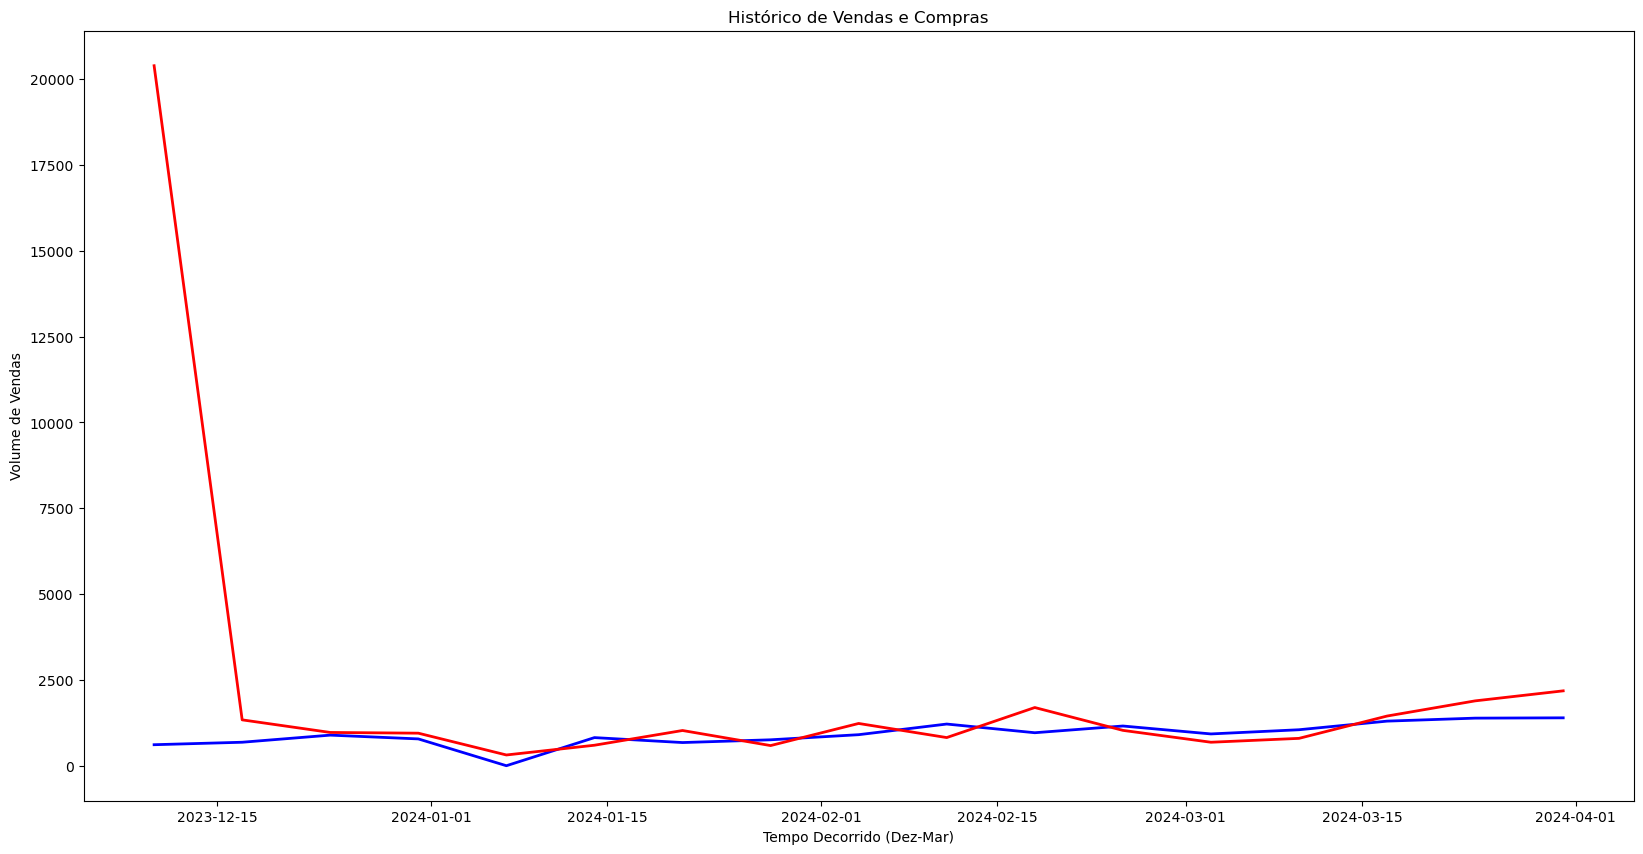

In [125]:
time = sales.index

buys = df[df['Flow'] == 'Produto'].groupby(pd.Grouper(freq='W'))['Amount'].sum()

plt.figure(figsize=(20, 10))

plt.plot(time, sales, color='blue',linewidth=2)

plt.plot(time, buys, color='red', linewidth=2)

plt.title('Histórico de Vendas e Compras')
plt.xlabel('Tempo Decorrido (Dez-Mar)')
plt.ylabel('Volume de Vendas')

plt.show()

In [126]:
products_sales = df.loc[df.Flow == "Venda"].groupby('Product').Amount.sum()
top_8_products_sales_vol = products_sales.sort_values(ascending=False)[:8].index
top_8_products = products_sales.sort_values(ascending=False)[:8]

print(top_8_products, top_8_products_sales_vol)

Product
Itaipava Latão          3827
Amstel Latão            1815
Heineken Latão           907
Coca Cola 2L             571
Spaten Latão             434
Heineken Long Neck       323
Império Branca Latão     310
Ice Off 275ml            304
Name: Amount, dtype: int64 Index(['Itaipava Latão', 'Amstel Latão', 'Heineken Latão', 'Coca Cola 2L',
       'Spaten Latão', 'Heineken Long Neck', 'Império Branca Latão',
       'Ice Off 275ml'],
      dtype='object', name='Product')


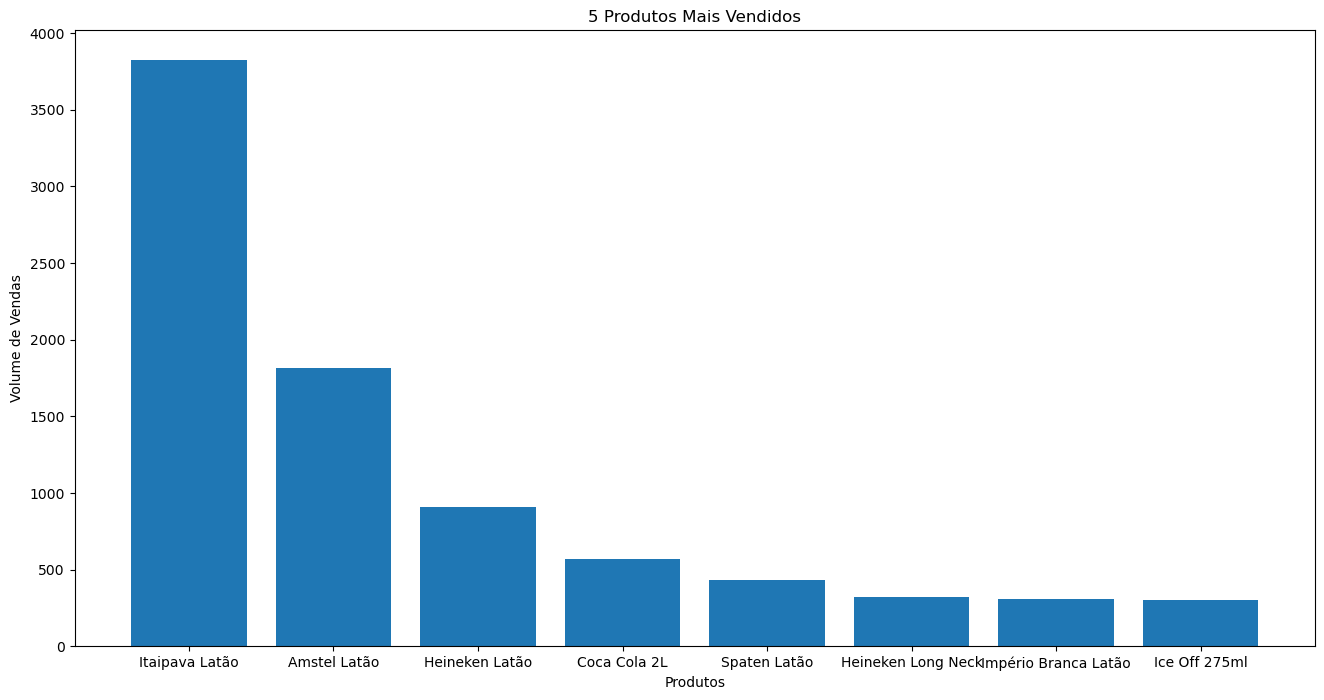

In [127]:
plt.figure(figsize=(16, 8))

plt.bar(top_8_products_sales_vol, top_8_products)

plt.title('5 Produtos Mais Vendidos')
plt.xlabel('Produtos')
plt.ylabel('Volume de Vendas')

plt.show()

In [128]:
products_buys = df.loc[df.Flow == "Produto"].groupby('Product').Amount.sum()
top_8_products_buys_vol = products_buys.sort_values(ascending=False)[:8].index
top_8_products = products_buys.sort_values(ascending=False)[:8]

print(top_8_products, top_8_products_buys_vol)

Product
3 Amstel 473ml      10000
Cigarro (Varejo)    10000
Itaipava Latão       4096
Amstel Latão         1776
Heineken Latão        948
Coca Cola 2L          583
Spaten Latão          446
Itaipava 1L           372
Name: Amount, dtype: int64 Index(['3 Amstel 473ml', 'Cigarro (Varejo)', 'Itaipava Latão', 'Amstel Latão',
       'Heineken Latão', 'Coca Cola 2L', 'Spaten Latão', 'Itaipava 1L'],
      dtype='object', name='Product')


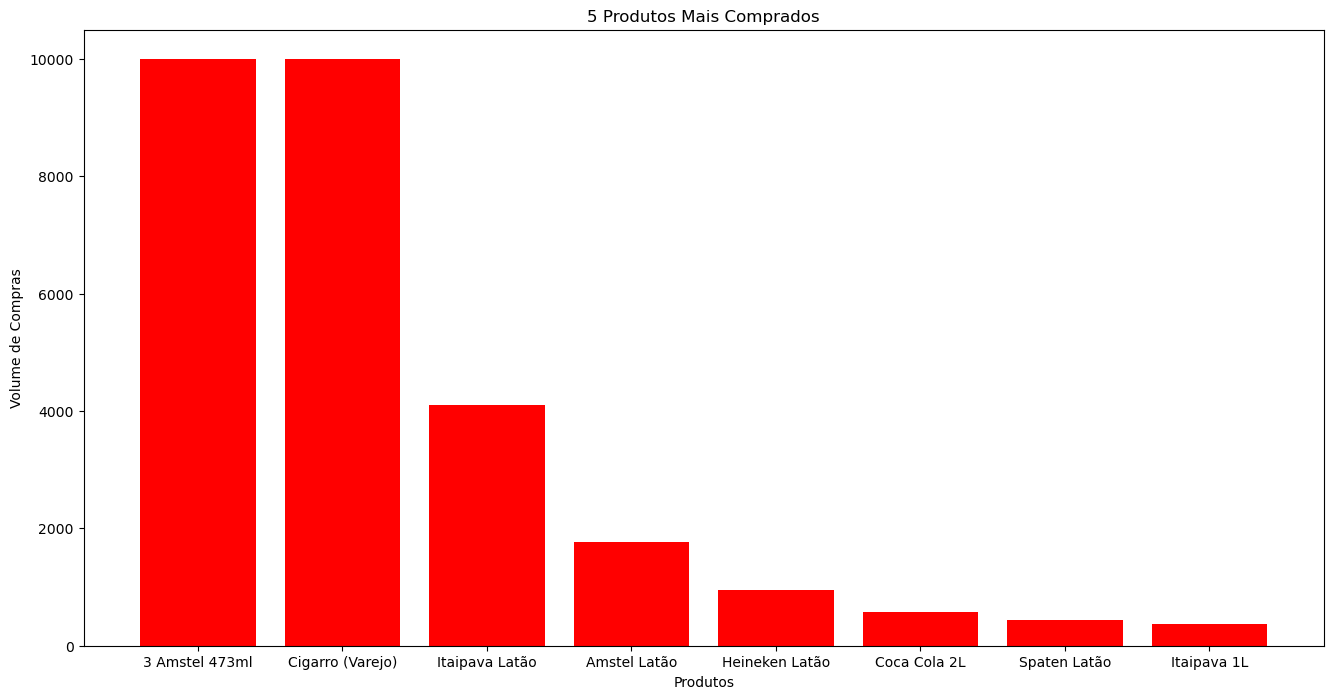

In [129]:
plt.figure(figsize=(16, 8))

plt.bar(top_8_products_buys_vol, top_8_products, color='red')

plt.title('5 Produtos Mais Comprados')
plt.xlabel('Produtos')
plt.ylabel('Volume de Compras')

plt.show()

In [130]:
import plotly.express as px
import pandas as pd

time = sales.index
buys = df[df['Flow'] == 'Produto'].groupby(pd.Grouper(freq='W'))['Amount'].sum()

fig = px.line()
fig.add_scatter(x=time, y=sales, mode='lines', name='Vendas', line=dict(color='blue', width=2))
fig.add_scatter(x=time, y=buys, mode='lines', name='Compras', line=dict(color='red', width=2))

fig.update_layout(
    title='Histórico de Vendas e Compras',
    xaxis_title='Tempo Decorrido (Dez-Mar)',
    yaxis_title='Volume de Vendas',
    width=1200,
    height=800,
    yaxis=dict(range=[-100, max(max(sales), max(buys))]) 
)

fig.show()
